# <b> 1.  REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [2]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(307511, 122)

# <b>2. A LOOK ON DATA

## <ul> <b>ADDRESSING TARGET CLASS IMBALANCE

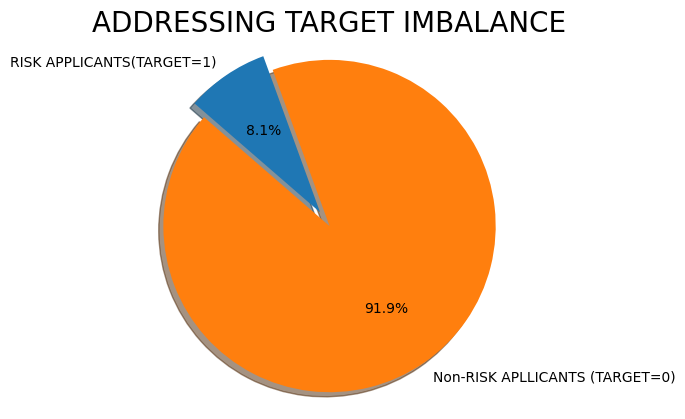

In [4]:
count1 = 0
count0 = 0
for i in df['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(df['TARGET']))*100
count0 = (count0/len(df['TARGET']))*100

x = ['RISK APPLICANTS(TARGET=1)','Non-RISK APLLICANTS (TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')
plt.title('ADDRESSING TARGET IMBALANCE',fontsize=20)
plt.show()

 From the piechart its clear that around
 * 91% of the applicants are in Non Risk Applicants
 * 8.1% of the are risk applicants

## <ul> <b>CHECKING NULL VALUE %

In [5]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

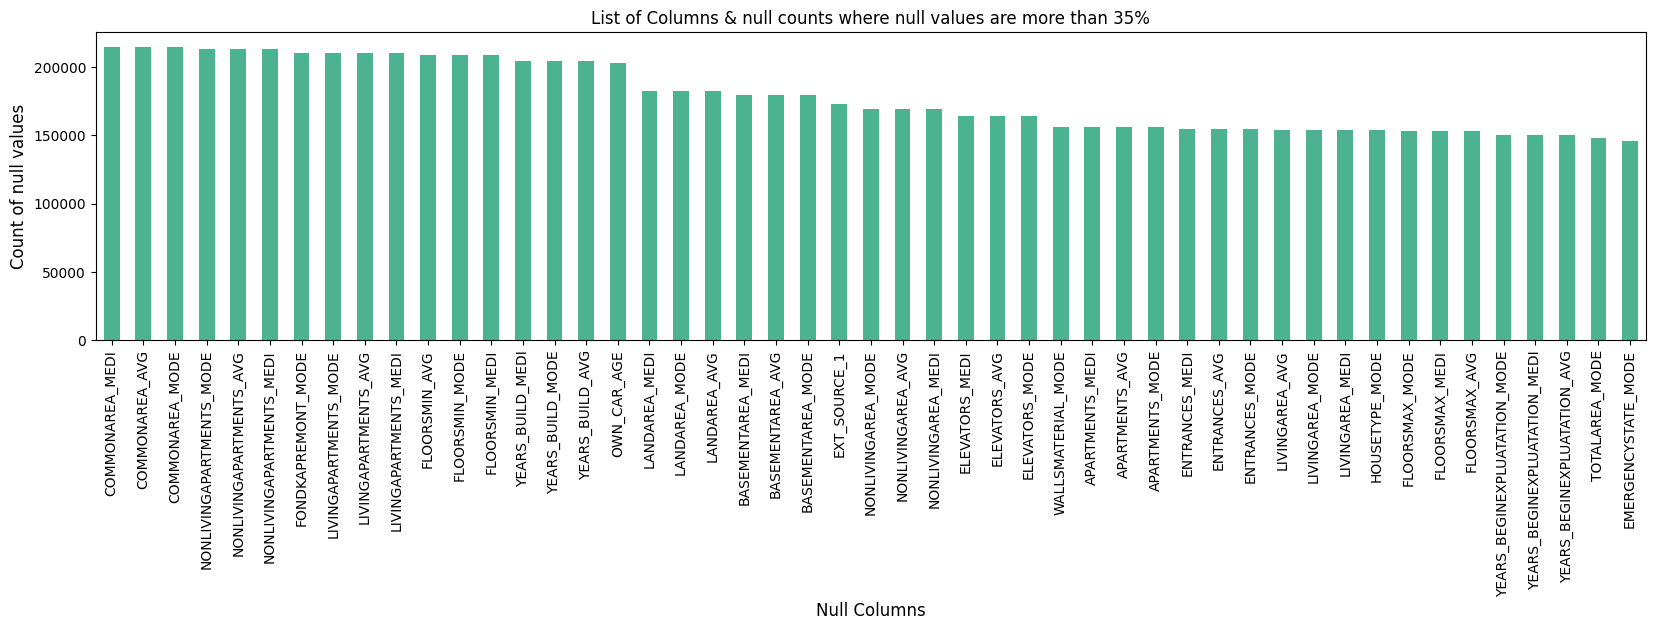

In [6]:
null_col = df.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df))]


#Plotting Bar Graph for null values greater than 35%

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")
plt.title('List of Columns & null counts where null values are more than 35%')

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})                  #Setting X-label and Y-label
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

# <b>3. OUTLIER HANDLING

## <b> <ul>3.1. HANDLING COLUMN `"OCCUPATION_TYPE"` </b>



### <ul><b>3.2. UNDERSTANDING THE REQUIRED COLUMN

<i>"Here a logical imputation has been used <br>
columns related to <b>`"OCCUPATION_TYPE"`</b> are

`"AMT_INCOME_TOTAL"`<br>
`"OCCUPATION_TYPE"` <br>
`"ORGANIZATION_TYPE"`<br>
`"NAME_INCOME_TYPE"`<br>
`"NAME_EDUCATION_TYPE"`<br>
`"DAYS_EMPLOYED"`<br>

In [7]:
df["OCCUPATION_TYPE"].isnull().sum()*100/df.shape[0]

31.345545362604916

<b>31 % of missing values</b> are present in the occupation type

In [8]:
df[["AMT_INCOME_TOTAL","OCCUPATION_TYPE","ORGANIZATION_TYPE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","DAYS_EMPLOYED"]]

,AMT_INCOME_TOTAL,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED
0,202500.0,Laborers,Business Entity Type 3,Working,Secondary / secondary special,-637
1,270000.0,Core staff,School,State servant,Higher education,-1188
2,67500.0,Laborers,Government,Working,Secondary / secondary special,-225
3,135000.0,Laborers,Business Entity Type 3,Working,Secondary / secondary special,-3039
4,121500.0,Core staff,Religion,Working,Secondary / secondary special,-3038
...,...,...,...,...,...,...
307506,157500.0,Sales staff,Services,Working,Secondary / secondary special,-236
307507,72000.0,NaN,XNA,Pensioner,Secondary / secondary special,365243
307508,153000.0,Managers,School,Working,Higher education,-7921
307509,171000.0,Laborers,Business Entity Type 1,Commercial associate,Secondary / secondary special,-4786


In [9]:
df[["AMT_INCOME_TOTAL","OCCUPATION_TYPE","ORGANIZATION_TYPE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","DAYS_EMPLOYED"]].dtypes

AMT_INCOME_TOTAL       float64
OCCUPATION_TYPE         object
ORGANIZATION_TYPE       object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
DAYS_EMPLOYED            int64
dtype: object

### <ul> <b>3.3. HANDLING DAYS COLUMN

<i>HERE I FOUND OUT DAYS COLUMNS ARE NOT WRITTEN IN CORRECT FORMAT

In [10]:
day_cols = [i for i in df if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [11]:
df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


In [12]:
df[day_cols]= abs(df[day_cols])

In [13]:
df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0
...,...,...,...,...,...
307506,9327,236,8456.0,1982,273.0
307507,20775,365243,4388.0,4090,0.0
307508,14966,7921,6737.0,5150,1909.0
307509,11961,4786,2562.0,931,322.0


### <ul> <b>3.4.IMPUTATION ON THE REQUIRED COLUMNS

In [14]:
df[["AMT_INCOME_TOTAL","OCCUPATION_TYPE","ORGANIZATION_TYPE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","DAYS_EMPLOYED"]].dtypes

AMT_INCOME_TOTAL       float64
OCCUPATION_TYPE         object
ORGANIZATION_TYPE       object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
DAYS_EMPLOYED            int64
dtype: object

<b>ASSUMPTIONS CHECKED</b>
* MISSING VALUE CHECKING
* OUTLIER CHECKING
* DISTANCE METRIC CHOICE
* NUMBER OF NEIGHBOURS (K)
* FEATURE IMPORTANCE
* ENCODING
* SCALING

#### MISSING VALUE CHECKING

In [15]:
df[["AMT_INCOME_TOTAL","OCCUPATION_TYPE","ORGANIZATION_TYPE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","DAYS_EMPLOYED"]].isnull().sum()*100/df.shape[0]

AMT_INCOME_TOTAL        0.000000
OCCUPATION_TYPE        31.345545
ORGANIZATION_TYPE       0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
DAYS_EMPLOYED           0.000000
dtype: float64

Only occupation type has missing values : 31%

#### OUTLIER CHECKING

##### <i><b>NUMERICAL COLUMNS

<ipython-input-16-0242b6a6d0cc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["DAYS_EMPLOYED"], palette="Set3")


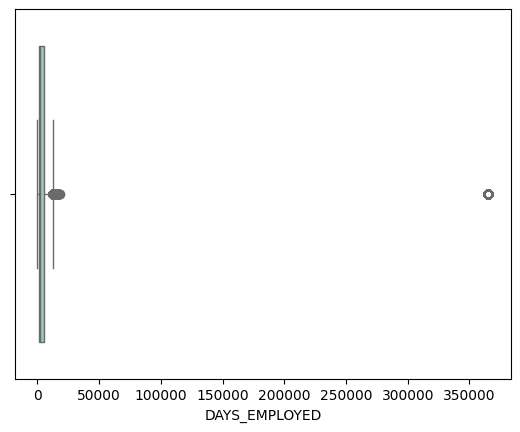

In [16]:
sns.boxplot(x=df["DAYS_EMPLOYED"], palette="Set3")
plt.show()

EXTREME OUTLIERS ARE PRESENT IN THE DAYS EMPLOYED COLUMNS

In [17]:
column_to_cap = "DAYS_EMPLOYED"
Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[column_to_cap] = df[column_to_cap].clip(lower=lower_bound, upper=upper_bound)

<ipython-input-18-0242b6a6d0cc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["DAYS_EMPLOYED"], palette="Set3")


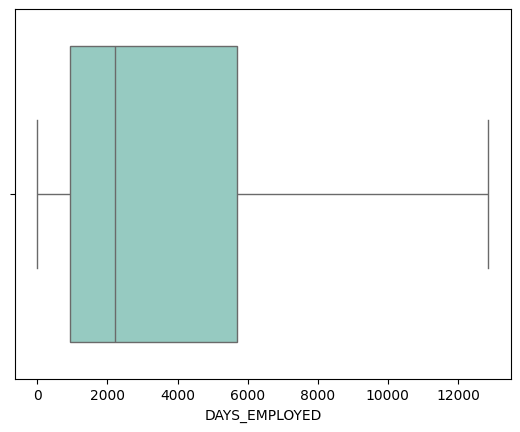

In [18]:
sns.boxplot(x=df["DAYS_EMPLOYED"], palette="Set3")
plt.show()

<ipython-input-19-714e4d157e09>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["AMT_INCOME_TOTAL"], palette="Set2")


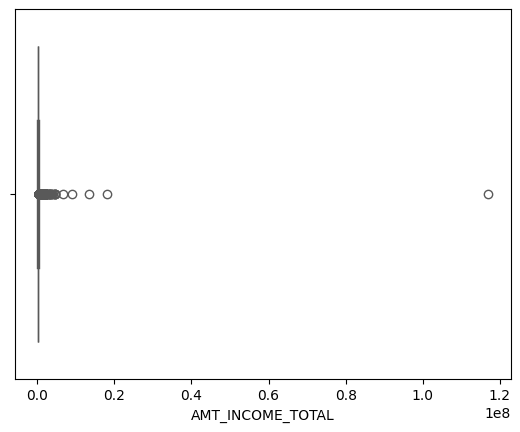

In [19]:
sns.boxplot(x=df["AMT_INCOME_TOTAL"], palette="Set2")
plt.show()

In [20]:
column_to_cap = "AMT_INCOME_TOTAL"
Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[column_to_cap] = df[column_to_cap].clip(lower=lower_bound, upper=upper_bound)

<ipython-input-21-714e4d157e09>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["AMT_INCOME_TOTAL"], palette="Set2")


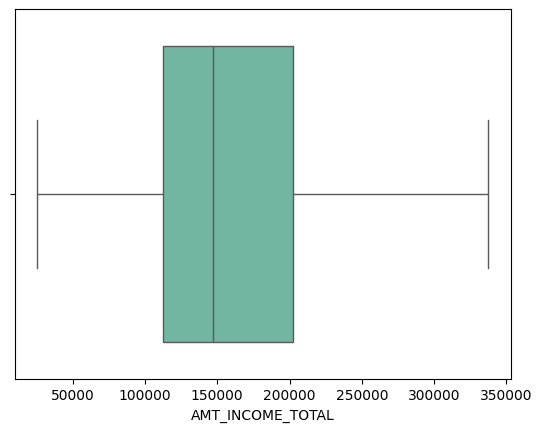

In [21]:
sns.boxplot(x=df["AMT_INCOME_TOTAL"], palette="Set2")
plt.show()

##### <i><b>CATEGORICAL COLUMNS

In [22]:
df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<ipython-input-23-58ed9ca3c4fd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="OCCUPATION_TYPE", data=df, palette="cubehelix")


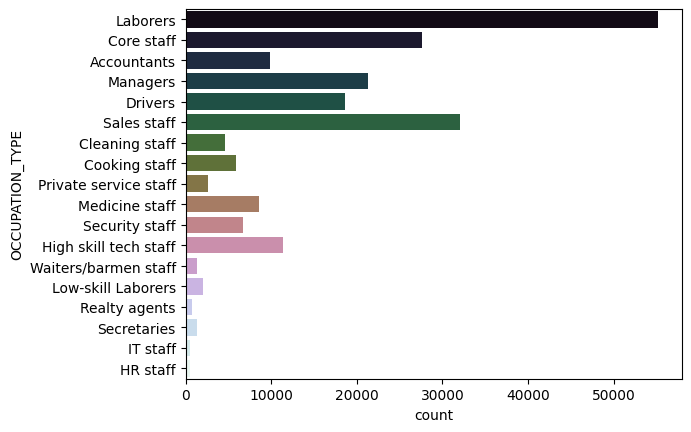

In [23]:
sns.countplot(y="OCCUPATION_TYPE", data=df, palette="cubehelix")
plt.show()

In [24]:
df.ORGANIZATION_TYPE.value_counts().shape

(58,)

<ipython-input-25-f262e677909e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="ORGANIZATION_TYPE", data=df, palette="magma")


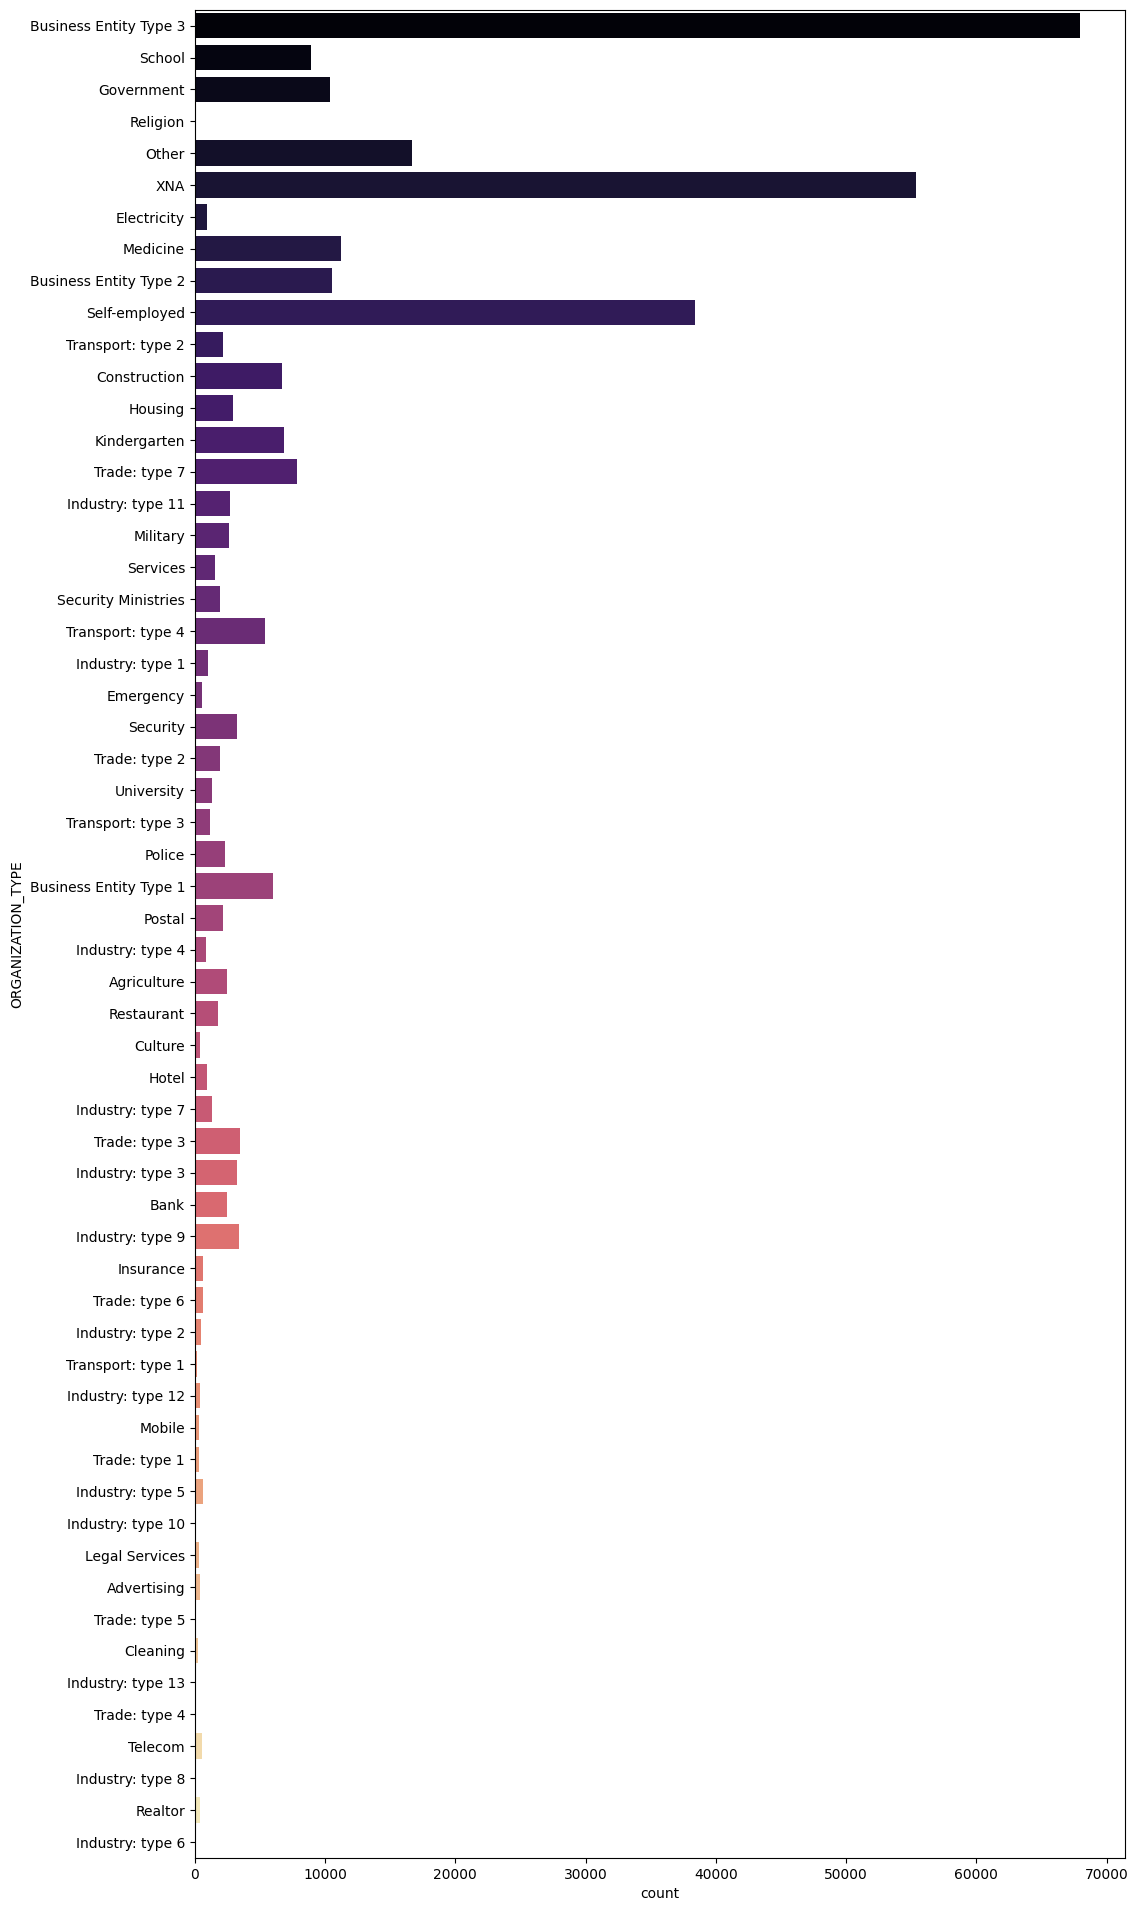

In [25]:
plt.figure(figsize=(12, 24))
sns.countplot(y="ORGANIZATION_TYPE", data=df, palette="magma")
plt.show()

In [26]:
df['ORGANIZATION_TYPE'].value_counts(ascending=False)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [27]:
#COMBINING LAST FEW CATEGORIES AS SINGLE CATEGORY

threshold_count = 115
category_counts = df['ORGANIZATION_TYPE'].value_counts()
categories_to_combine = category_counts[category_counts < threshold_count].index
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: 'Other' if x in categories_to_combine else x)

In [28]:
df['ORGANIZATION_TYPE'].value_counts(ascending=False)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     17193
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [29]:
df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

<ipython-input-30-378c97ebdae2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="NAME_INCOME_TYPE", data=df, palette="cubehelix")


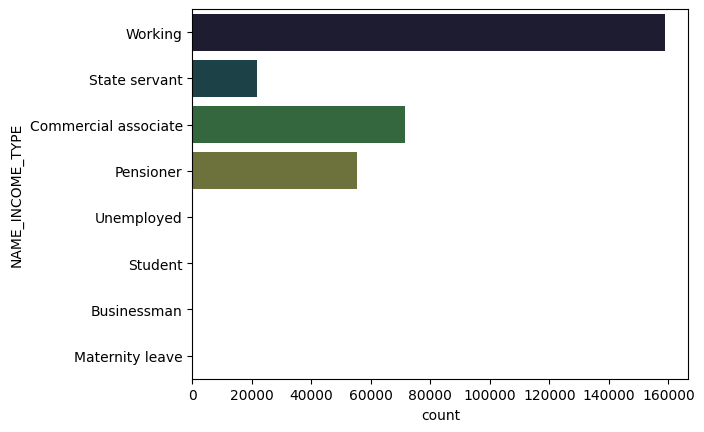

In [30]:
# COLUMN- NAME_INCOME_TYPE



sns.countplot(y="NAME_INCOME_TYPE", data=df, palette="cubehelix")
plt.show()

In [31]:

threshold_count = 25

# Calculate counts for each category
category_counts = df["NAME_INCOME_TYPE"].value_counts()
categories_to_drop = category_counts[category_counts < threshold_count].index

# Drop rows with categories below the threshold
df = df[~df['NAME_INCOME_TYPE'].isin(categories_to_drop)]
df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Name: NAME_INCOME_TYPE, dtype: int64

In [32]:
# COLUMN- NAME_EDUCATION_TYPE



df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218365
Higher education                  74838
Incomplete higher                 10273
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

<ipython-input-33-b4b2cc858208>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="NAME_EDUCATION_TYPE", data=df, palette="cubehelix")


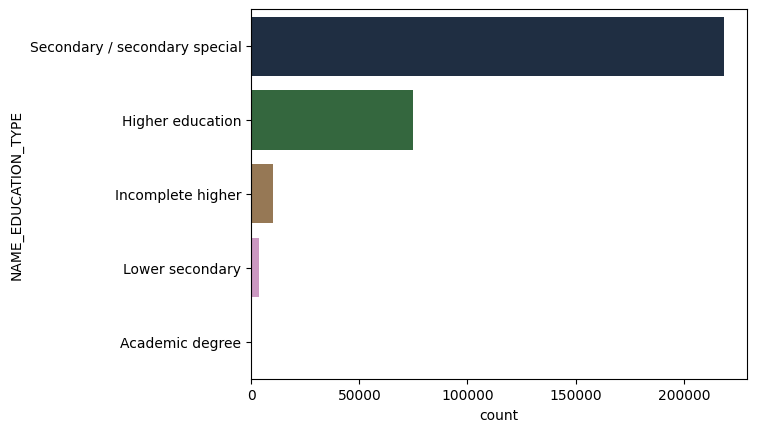

In [33]:
sns.countplot(y="NAME_EDUCATION_TYPE", data=df, palette="cubehelix")
plt.show()

In [34]:
# Set a threshold count
threshold_count = 165

# Calculate counts for each category
category_counts = df["NAME_EDUCATION_TYPE"].value_counts()
categories_to_drop = category_counts[category_counts < threshold_count].index

# Drop rows with categories below the threshold
df = df[~df['NAME_EDUCATION_TYPE'].isin(categories_to_drop)]
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218365
Higher education                  74838
Incomplete higher                 10273
Lower secondary                    3816
Name: NAME_EDUCATION_TYPE, dtype: int64

#####ENCODING COLUMNS BEFORE IMPUTATION

In [35]:
df[["AMT_INCOME_TOTAL","OCCUPATION_TYPE","ORGANIZATION_TYPE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","DAYS_EMPLOYED"]]

,AMT_INCOME_TOTAL,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED
0,202500.0,Laborers,Business Entity Type 3,Working,Secondary / secondary special,637
1,270000.0,Core staff,School,State servant,Higher education,1188
2,67500.0,Laborers,Government,Working,Secondary / secondary special,225
3,135000.0,Laborers,Business Entity Type 3,Working,Secondary / secondary special,3039
4,121500.0,Core staff,Other,Working,Secondary / secondary special,3038
...,...,...,...,...,...,...
307506,157500.0,Sales staff,Services,Working,Secondary / secondary special,236
307507,72000.0,NaN,XNA,Pensioner,Secondary / secondary special,12868
307508,153000.0,Managers,School,Working,Higher education,7921
307509,171000.0,Laborers,Business Entity Type 1,Commercial associate,Secondary / secondary special,4786


In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df[["AMT_INCOME_TOTAL","ORGANIZATION_TYPE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","DAYS_EMPLOYED"]].select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    df[column + '_encoded'] = label_encoders[column].fit_transform(df[column])

# Display the dataset with encoded columns
print("\nDataset with Encoded Columns:")
df[["AMT_INCOME_TOTAL","OCCUPATION_TYPE","ORGANIZATION_TYPE_encoded","NAME_INCOME_TYPE_encoded","NAME_EDUCATION_TYPE_encoded","DAYS_EMPLOYED"]]


Dataset with Encoded Columns:


,AMT_INCOME_TOTAL,OCCUPATION_TYPE,ORGANIZATION_TYPE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,DAYS_EMPLOYED
0,202500.0,Laborers,5,3,3,637
1,270000.0,Core staff,34,2,0,1188
2,67500.0,Laborers,11,3,3,225
3,135000.0,Laborers,5,3,3,3039
4,121500.0,Core staff,29,3,3,3038
...,...,...,...,...,...,...
307506,157500.0,Sales staff,38,3,3,236
307507,72000.0,NaN,50,1,3,12868
307508,153000.0,Managers,34,3,0,7921
307509,171000.0,Laborers,3,0,3,4786


##### STANDARDIZATION OF COLUMNS

In [37]:
df[["AMT_INCOME_TOTAL","DAYS_EMPLOYED"]]

,AMT_INCOME_TOTAL,DAYS_EMPLOYED
0,202500.0,637
1,270000.0,1188
2,67500.0,225
3,135000.0,3039
4,121500.0,3038
...,...,...
307506,157500.0,236
307507,72000.0,12868
307508,153000.0,7921
307509,171000.0,4786


In [38]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_columns = df[["AMT_INCOME_TOTAL","DAYS_EMPLOYED"]].select_dtypes(include=['number']).columns

# Standardize numeric columns
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df[numeric_columns])
scaled_columns = [f'{col}_scaled' for col in numeric_columns]
df[scaled_columns] = scaled_features

In [39]:
# Display the standardized data
print("Standardized Data:")
df[["AMT_INCOME_TOTAL_scaled","OCCUPATION_TYPE","ORGANIZATION_TYPE_encoded","NAME_INCOME_TYPE_encoded","NAME_EDUCATION_TYPE_encoded","DAYS_EMPLOYED_scaled"]].head()

Standardized Data:


,AMT_INCOME_TOTAL_scaled,OCCUPATION_TYPE,ORGANIZATION_TYPE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,DAYS_EMPLOYED_scaled
0,0.544493,Laborers,5,3,3,-0.799241
1,1.465610,Core staff,34,2,0,-0.677954
2,-1.297742,Laborers,11,3,3,-0.889932
3,-0.376625,Laborers,5,3,3,-0.270507
4,-0.560848,Core staff,29,3,3,-0.270727


##### FILLING MISSING VALUES WITH RANDOM FOREST CLASSIFIER

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


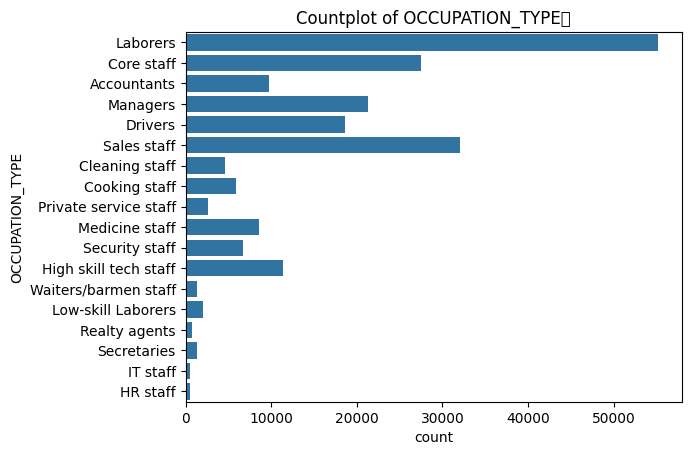

In [41]:
sns.countplot(y='OCCUPATION_TYPE', data=df)

# Show the plot
plt.title('Countplot of OCCUPATION_TYPE	')
plt.show()

In [42]:
ordinal_categorical_columns = ['OCCUPATION_TYPE']
numeric_columns = ["AMT_INCOME_TOTAL_scaled","ORGANIZATION_TYPE_encoded","NAME_INCOME_TYPE_encoded","NAME_EDUCATION_TYPE_encoded","DAYS_EMPLOYED_scaled"]

In [43]:
train_data = df.dropna(subset=ordinal_categorical_columns)
test_data = df[df['OCCUPATION_TYPE'].isna()]

In [44]:
model = RandomForestClassifier(random_state=42)
model.fit(train_data[numeric_columns], train_data['OCCUPATION_TYPE'])

RandomForestClassifier(random_state=42)

In [45]:
predicted_values = model.predict(test_data[numeric_columns])

# Update the original data with imputed values
df.loc[df['OCCUPATION_TYPE'].isna(), 'OCCUPATION_TYPE'] = predicted_values

# Display the original and imputed data
print("Original Data:")
df.head()

Original Data:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ORGANIZATION_TYPE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,AMT_INCOME_TOTAL_scaled,DAYS_EMPLOYED_scaled
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,5,3,3,0.544493,-0.799241
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,34,2,0,1.465610,-0.677954
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,11,3,3,-1.297742,-0.889932
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,5,3,3,-0.376625,-0.270507
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,29,3,3,-0.560848,-0.270727


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


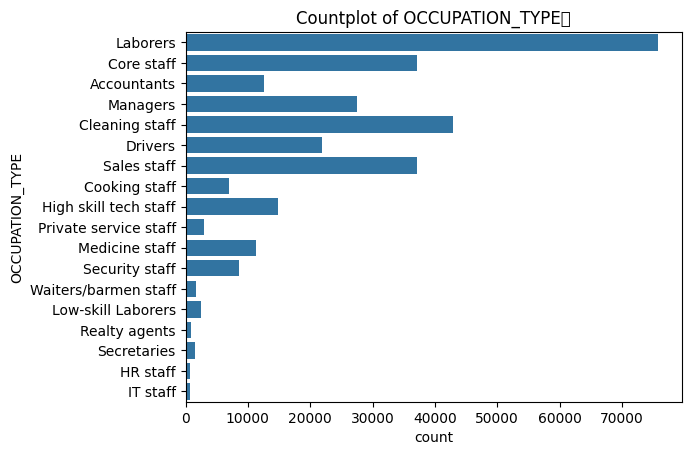

In [46]:
sns.countplot(y='OCCUPATION_TYPE', data=df)
# Show the plot
plt.title('Countplot of OCCUPATION_TYPE	')
plt.show()

In [47]:
df=df.drop(columns=numeric_columns)

In [48]:
df.to_csv('/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/1_OCCUPATION_TYPE(Fillna).csv', index=False)